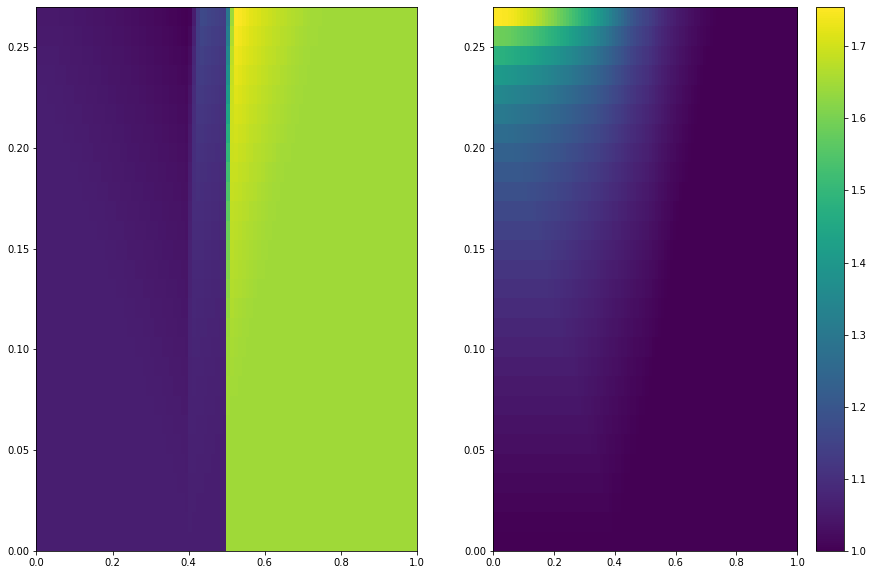

In [2]:
import matplotlib.pyplot as plt
import os
import h5py
import numpy as np

os.environ['HDF5_USE_FILE_LOCKING'] = 'TRUE'

def GetSize(path):
    file = h5py.File(path, mode='r')
    n = file["times"].shape[0]
    file.close()
    return n

def Load(path, chunk=[]):
    # @brief Reads grid data and time data from a specified hdf5 file.
    # @param path The path of the HDF5 file
    # @param dataset A string name of the main dataset containing the states data
    # @param times A string name of the time dataset containing all time points
    # @param chunk An optional [start, end] list that specifies how many time steps to load
    file = h5py.File(path, "r")
    if chunk:
        data_array = np.array(file['data'][chunk[0]:chunk[1],:,:])
        time_array = np.array(file['times'][chunk[0]:chunk[1]])
    else:
        data_array = np.array(file['data'][:, 0, :, :])
        time_array = np.array(file['times'])
    file.close()
    return data_array #, time_array)

#path1 = '/home/maikel/Development/FiniteVolumeSolver/build_2D-Release/HLLEM.h5'
path = '/home/christian/FVS_develop/FiniteVolumeSolver/build/Characteristics.h5'

file = h5py.File(path, mode='r')
data = np.array(file['data'][:, :, :, :])
t = np.array(file['times'][:])
dx = file['data'].attrs['cell_size']
xlower = file['data'].attrs['xlower']
file.close()

#file1 = h5py.File(path1, mode='r')
#data1 = np.array(file1['data'])
#file1.close()

nx = [data.shape[2], data.shape[3]]
xupper = xlower + dx * nx

vmin = None #0.4
vmax = None #2.0

xs = np.array(np.linspace(xlower[0], xupper[0], nx[0], endpoint=True))

f, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 10))
#dxt = [int(nx[0] / (nticks - 1)), int(nx[1] / (nticks - 1))]
im0 = axs[0].imshow(data[:, 0, :, 0], origin='lower', interpolation='none', extent=(np.amin(xs), np.amax(xs), np.amin(t), np.amax(t)), aspect='auto')
im1 = axs[1].imshow(data[:, 5, :, 0], origin='lower', interpolation='none', extent=(np.amin(xs), np.amax(xs), np.amin(t), np.amax(t)), aspect='auto')
# axs[1].imshow(data1[:, 5, :, 0], origin='lower', interpolation='none', extent=(np.amin(xs), np.amax(xs), np.amin(t), np.amax(t)), aspect='auto')
plt.colorbar(im1)
plt.show()
#f.savefig('/home/maikel/DensityAndPressure.png')

[-0.    -0.015] [1000, 1] [1.    0.015]
(11, 6, 1000, 1)


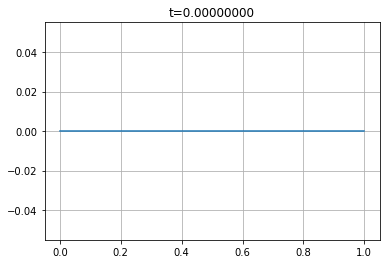

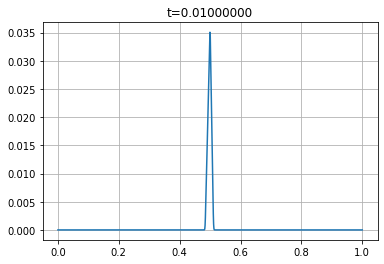

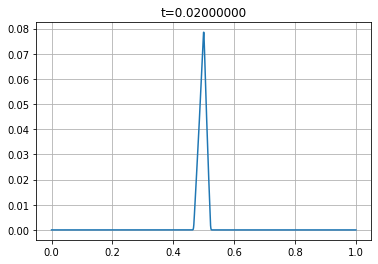

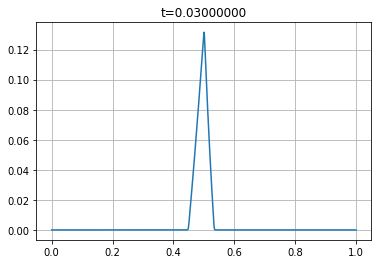

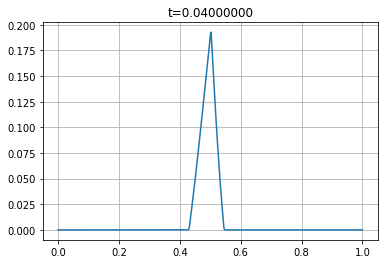

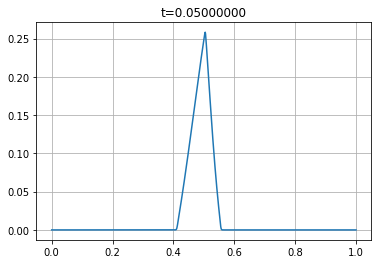

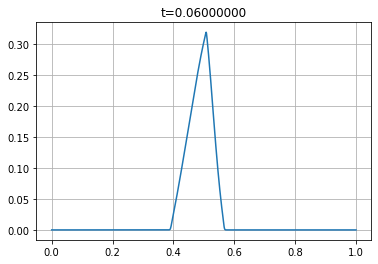

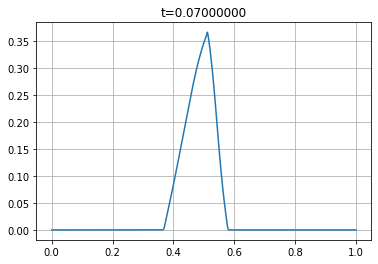

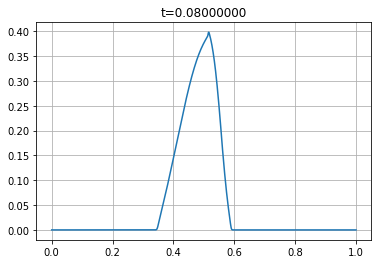

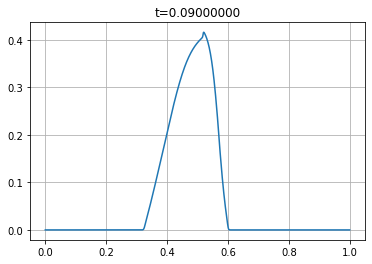

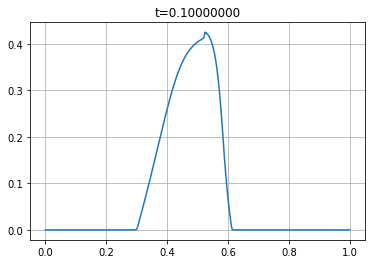

In [26]:
import matplotlib.pyplot as plt
import os
import h5py
import numpy as np

os.environ['HDF5_USE_FILE_LOCKING'] = 'TRUE'

def GetSize(path):
    file = h5py.File(path, mode='r')
    n = file["times"].shape[0]
    file.close()
    return n

def Load(path, chunk=[]):
    # @brief Reads grid data and time data from a specified hdf5 file.
    # @param path The path of the HDF5 file
    # @param dataset A string name of the main dataset containing the states data
    # @param times A string name of the time dataset containing all time points
    # @param chunk An optional [start, end] list that specifies how many time steps to load
    file = h5py.File(path, "r")
    if chunk:
        data_array = np.array(file['data'][chunk[0]:chunk[1],:,:])
        time_array = np.array(file['times'][chunk[0]:chunk[1]])
    else:
        data_array = np.array(file['data'][:, 0, :, :])
        time_array = np.array(file['times'])
    file.close()
    return data_array #, time_array)

# path = '/home/maikel/Development/FiniteVolumeSolver/build_2D-Debug/HLLEM.h5'
# path1 = '/home/maikel/Development/FiniteVolumeSolver/build_2D-Debug/Characteristics.h5'
path = '/home/christian/FVS_develop/FiniteVolumeSolver/build/Characteristics.h5'


file = h5py.File(path, mode='r')
data = np.array(file['data'])
times = np.array(file['times'])
dx = file['data'].attrs['cell_size']
xlower = file['data'].attrs['xlower']
file.close()

#file1 = h5py.File(path1, mode='r')
#data1 = np.array(file1['data'])
#times = np.array(file1['times'])
#dx = file1['data'].attrs['cell_size']
#xlower = file1['data'].attrs['xlower']
#file1.close()
nx = [data.shape[2], data.shape[3]]
xupper = xlower + dx * nx
print(xlower, nx, xupper)
print(data.shape)
vmin = None #0.4
vmax = None #2.0
ns = [i for i in range(data.shape[0])]
#print(ns)

marker_style = dict(color='black',  fillstyle='none', linestyle='none', marker='o',
                    markersize=5, markerfacecoloralt='tab:red')

for n in ns:
    rho = data[n, 0, :, 0]
    #rho1 = data1[n, 0, :, 0]
    #rho2 = data2[n, 0, :, 0]
    rhou = data[n, 1, :, 0]
    u = rhou / rho
    p = data[n, 4, :, 0]
    T = p / rho / 1.0
    #rhoY = data[n, 4, :, 0]
    #rhoY1 = data1[n, 4, :, 0]
    #rhoY2 = data2[n, 4, :, 0]
    #Y = rhoY / rho
    #Y1 = rhoY1 / rho1
    #Y2 = rhoY2 / rho2
    
    #p1 = data1[n, 4, :, 0]
    f, ax = plt.subplots()
    x = np.array(np.linspace(xlower[0], xupper[0], nx[0], endpoint=True))
    #print(x)
    #print(p1.shape)
    #print(x.shape)
    #dxt = [int(nx[0] / (nticks - 1)), int(nx[1] / (nticks - 1))]
    #ax.set_ylim(0, 1)
    ax.plot(x, T)
    plt.grid(True)
    plt.title("t=%2.8f"%times[n])
    plt.show()
    #os.makedirs('/home/maikel/SEC/', exist_ok=True)
    #f.savefig('/home/maikel/SEC/Pressure_{}.png'.format(n))

In [ ]:
import matplotlib.pyplot as plt
import os
import h5py
import numpy as np

os.environ['HDF5_USE_FILE_LOCKING'] = 'TRUE'

def GetSize(path):
    file = h5py.File(path, mode='r')
    n = file["times"].shape[0]
    file.close()
    return n

def Load(path, chunk=[]):
    # @brief Reads grid data and time data from a specified hdf5 file.
    # @param path The path of the HDF5 file
    # @param dataset A string name of the main dataset containing the states data
    # @param times A string name of the time dataset containing all time points
    # @param chunk An optional [start, end] list that specifies how many time steps to load
    file = h5py.File(path, "r")
    if chunk:
        data_array = np.array(file['data'][chunk[0]:chunk[1],:,:])
        time_array = np.array(file['times'][chunk[0]:chunk[1]])
    else:
        data_array = np.array(file['data'][:, 0, :, :])
        time_array = np.array(file['times'])
    file.close()
    return data_array #, time_array)

path = '/home/maikel/Development/FiniteVolumeSolver/build_2D-Debug/Conservative.h5'
# path = '/home/maikel/Development/FiniteVolumeSolver/build_2D-Debug/Primitive.h5'
path1 = '/home/maikel/Development/FiniteVolumeSolver/build_2D-Debug/Characteristics.h5'
path2 = '/home/maikel/Development/FiniteVolumeSolver/build_2D-Debug/HLLEM.h5'

file = h5py.File(path, mode='r')
data = np.array(file['data'])
times = np.array(file['times'])
dx = file['data'].attrs['cell_size']
xlower = file['data'].attrs['xlower']
file.close()

file1 = h5py.File(path1, mode='r')
data1 = np.array(file1['data'])
#times = np.array(file['times'])
#dx = file['data'].attrs['cell_size']
#xlower = file['data'].attrs['xlower']
file1.close()


file2 = h5py.File(path2, mode='r')
data2 = np.array(file2['data'])
#times = np.array(file['times'])
#dx = file['data'].attrs['cell_size']
#xlower = file['data'].attrs['xlower']
file2.close()


nx = [data.shape[2], data.shape[3]]
xupper = xlower + dx * nx

vmin = None #0.4
vmax = None #2.0

ns = [i for i in range(data.shape[0])]
ns = [ns[-1]]
# print(ns)

marker_style = dict(color='black',  fillstyle='none', linestyle='none', marker='o',
                    markersize=5, markerfacecoloralt='tab:red')
marker_style2 = dict(color='blue',  fillstyle='none', linestyle='none', marker='o',
                    markersize=5, markerfacecoloralt='tab:red')


for n in ns:
    rho = data[n, 0, :, 0]
    rho1 = data1[n, 0, :, 0]
    rho2 = data2[n, 0, :, 0]
    rhou = data[n, 1, :, 0]
    u = rhou / rho
    p = data[n, 4, :, 0]
    rhoY = data[n, 4, :, 0]
    rhoY1 = data1[n, 4, :, 0]
    rhoY2 = data2[n, 4, :, 0]
    Y = rhoY / rho
    Y1 = rhoY1 / rho1
    Y2 = rhoY2 / rho2
    real_x = np.array(np.linspace(xlower[0], xupper[0], nx[0], endpoint=True))
    #dxt = [int(nx[0] / (nticks - 1)), int(nx[1] / (nticks - 1))]
    
    # f, ax = plt.subplots(figsize=(10, 7))
    plt.plot(real_x, Y, label='2nd order')
    plt.plot(real_x, Y1, label='char')
    plt.plot(real_x, Y2, label='hllem')
    plt.grid('on')
    plt.legend()
    #ax.set_title('Time: {:.3}s'.format(times[n]))
    plt.show()